#Итоговая работа

#Выполнил: Зюликов Олег Александрович

##Импортируем необходимые библиотеки

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.utils import normalize
from keras.utils.np_utils import normalize
from tensorflow.keras import optimizers

##Загружаем датасеты из файлов

In [159]:
df1 = pd.read_excel('X_bp.xlsx')
df1

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [160]:
df2 = pd.read_excel('X_nup.xlsx')
df2

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.000000,57.000000
1,1.0,0.0,4.000000,60.000000
2,2.0,0.0,4.000000,70.000000
3,3.0,0.0,5.000000,47.000000
4,4.0,0.0,5.000000,57.000000
...,...,...,...,...
1035,1035.0,90.0,8.088111,47.759177
1036,1036.0,90.0,7.619138,66.931932
1037,1037.0,90.0,9.800926,72.858286
1038,1038.0,90.0,10.079859,65.519479


##Объединяем датасеты по индексу, тип объединения INNER

In [161]:
df = df1.merge(df2, how='inner', left_index=True, right_index=True)
df

,Unnamed: 0_x,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Unnamed: 0_y,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,0.0,4.000000,57.000000
1,1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,1.0,0.0,4.000000,60.000000
2,2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,2.0,0.0,4.000000,70.000000
3,3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,3.0,0.0,5.000000,47.000000
4,4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,4.0,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1018.0,90.0,9.076380,47.019770
1019,1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1019.0,90.0,10.565614,53.750790
1020,1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1020.0,90.0,4.161154,67.629684
1021,1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1021.0,90.0,6.313201,58.261074


##Удаляем повторяющиеся признаки

In [162]:
df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


##Проведем корректировку заголовков признаков

In [163]:
df.columns = ['соот_матр_нап', 'плотность', 'мод_упр', 'кол_отв', 'сод_эп_гр', 'темп_всп', 'пов_плотн', 'мод_упр_раст', 'проч_раст', 'потр_смолы', 'угол_наш', 'шаг_наш', 'плотн_наш']
df

,соот_матр_нап,плотность,мод_упр,кол_отв,сод_эп_гр,темп_всп,пов_плотн,мод_упр_раст,проч_раст,потр_смолы,угол_наш,шаг_наш,плотн_наш
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


##Проведем разведочный анализ данных

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   соот_матр_нап  1023 non-null   float64
 1   плотность      1023 non-null   float64
 2   мод_упр        1023 non-null   float64
 3   кол_отв        1023 non-null   float64
 4   сод_эп_гр      1023 non-null   float64
 5   темп_всп       1023 non-null   float64
 6   пов_плотн      1023 non-null   float64
 7   мод_упр_раст   1023 non-null   float64
 8   проч_раст      1023 non-null   float64
 9   потр_смолы     1023 non-null   float64
 10  угол_наш       1023 non-null   float64
 11  шаг_наш        1023 non-null   float64
 12  плотн_наш      1023 non-null   float64
dtypes: float64(13)
memory usage: 111.9 KB


In [165]:
df.duplicated().sum()

0

In [166]:
df.describe()

,соот_матр_нап,плотность,мод_упр,кол_отв,сод_эп_гр,темп_всп,пов_плотн,мод_упр_раст,проч_раст,потр_смолы,угол_наш,шаг_наш,плотн_наш
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


##Нарисуем гистограммы распределения переменных

In [167]:
int_var = df.columns

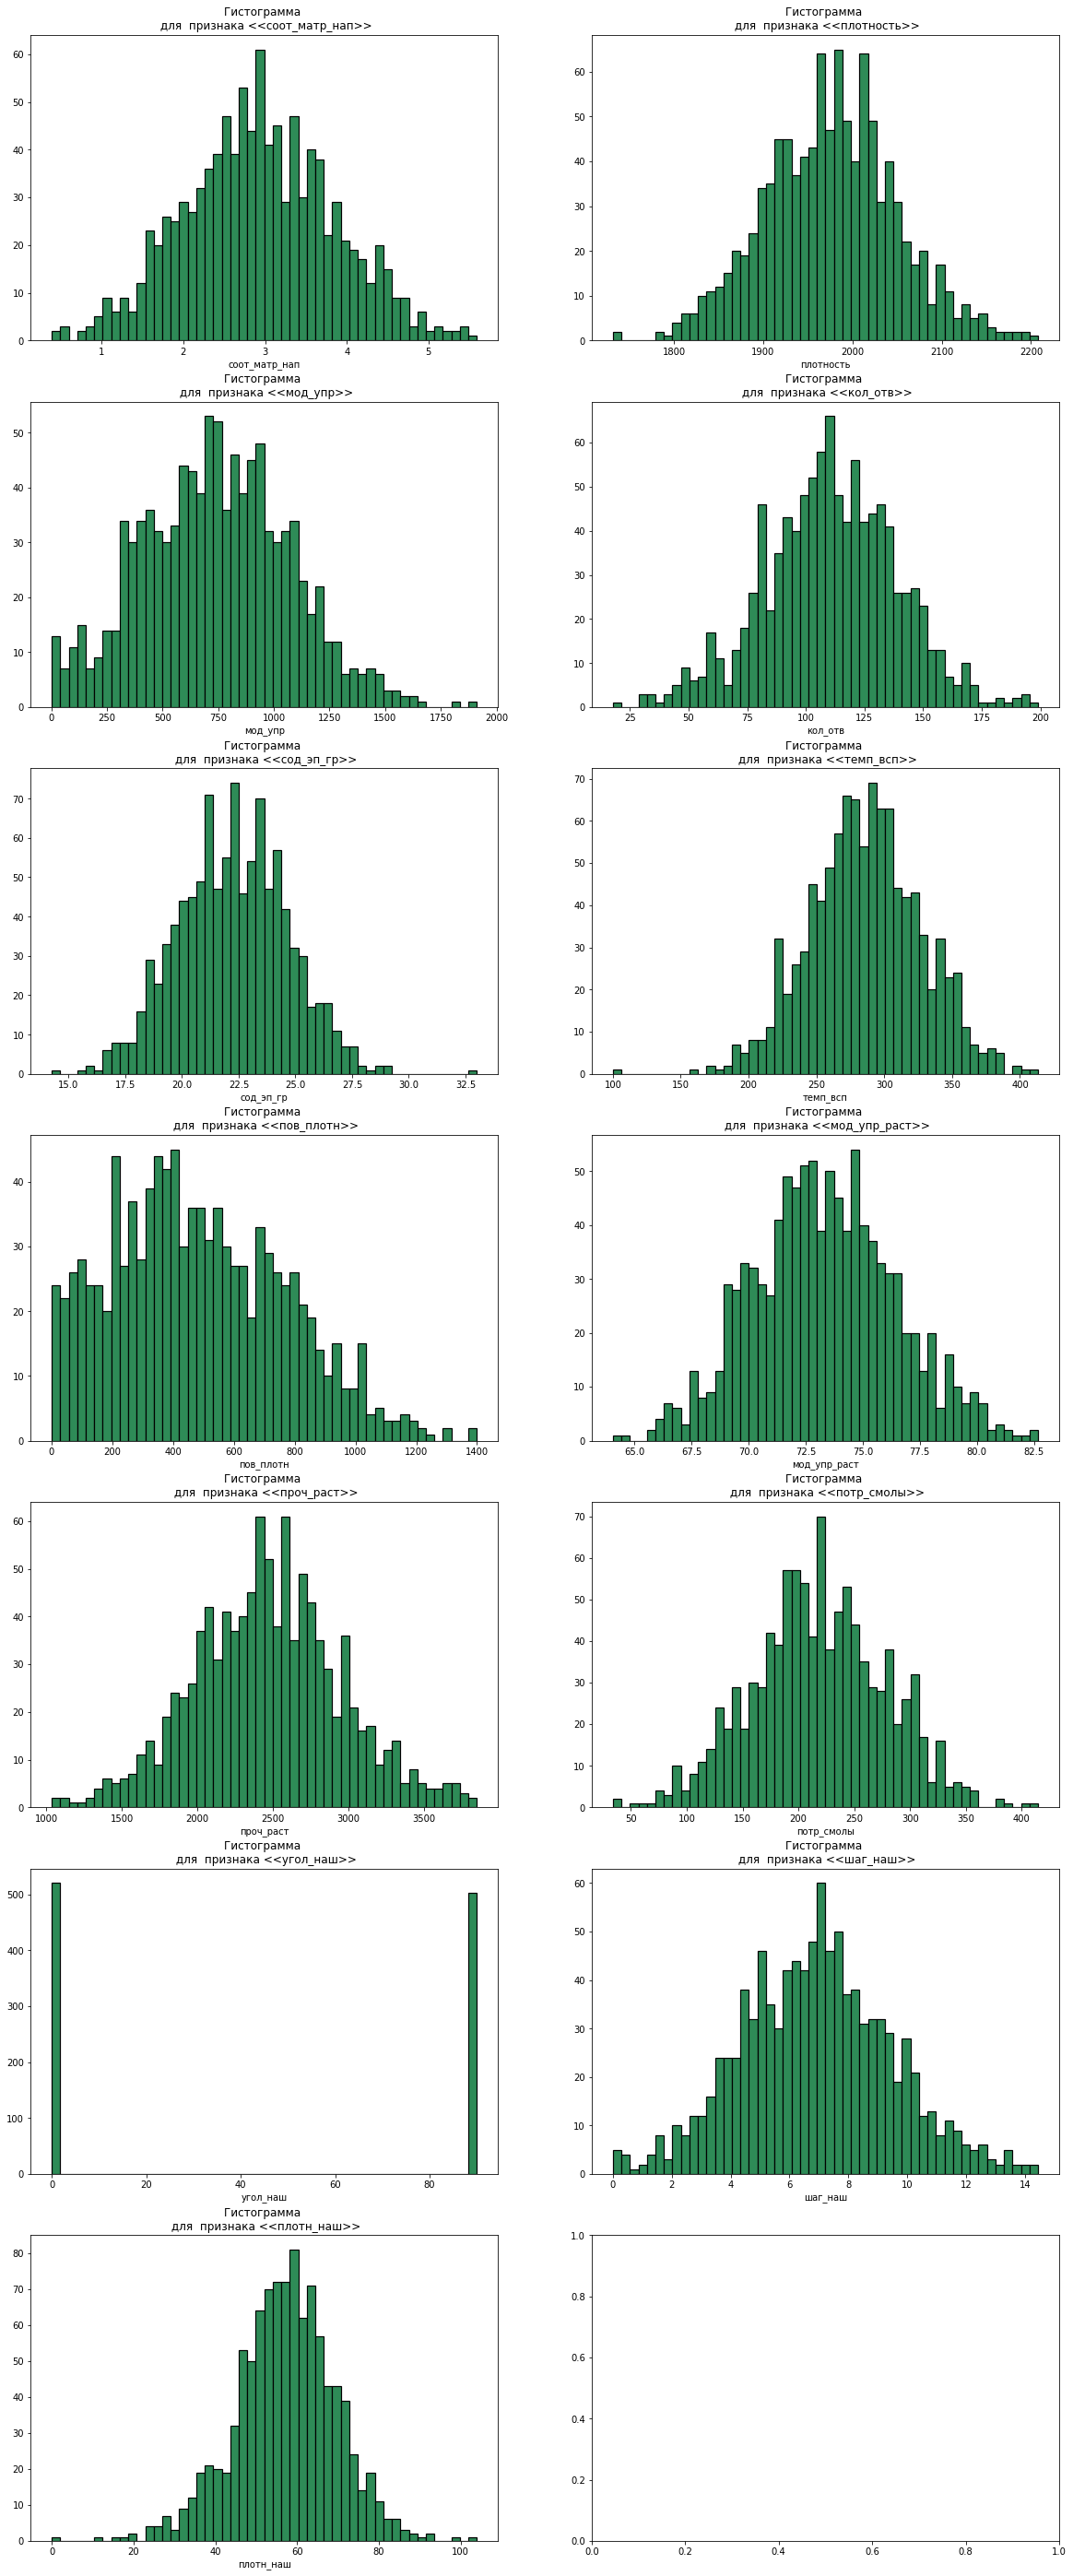

In [168]:
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(20,50))
l = 0
for i in range(7):
    for j in range(2):
        axes[i, j].hist(df[int_var[l]], bins = 50, color = "seagreen", edgecolor='black', linewidth=1.2)
        axes[i, j].set_title("Гистограмма \n для  признака <<{}>>".format(int_var[l]))
        axes[i, j].set_xlabel(int_var[l])
        l+=1
        if l > 12:
          break

##Построим диаграммы ящика с усами для определения выбросов

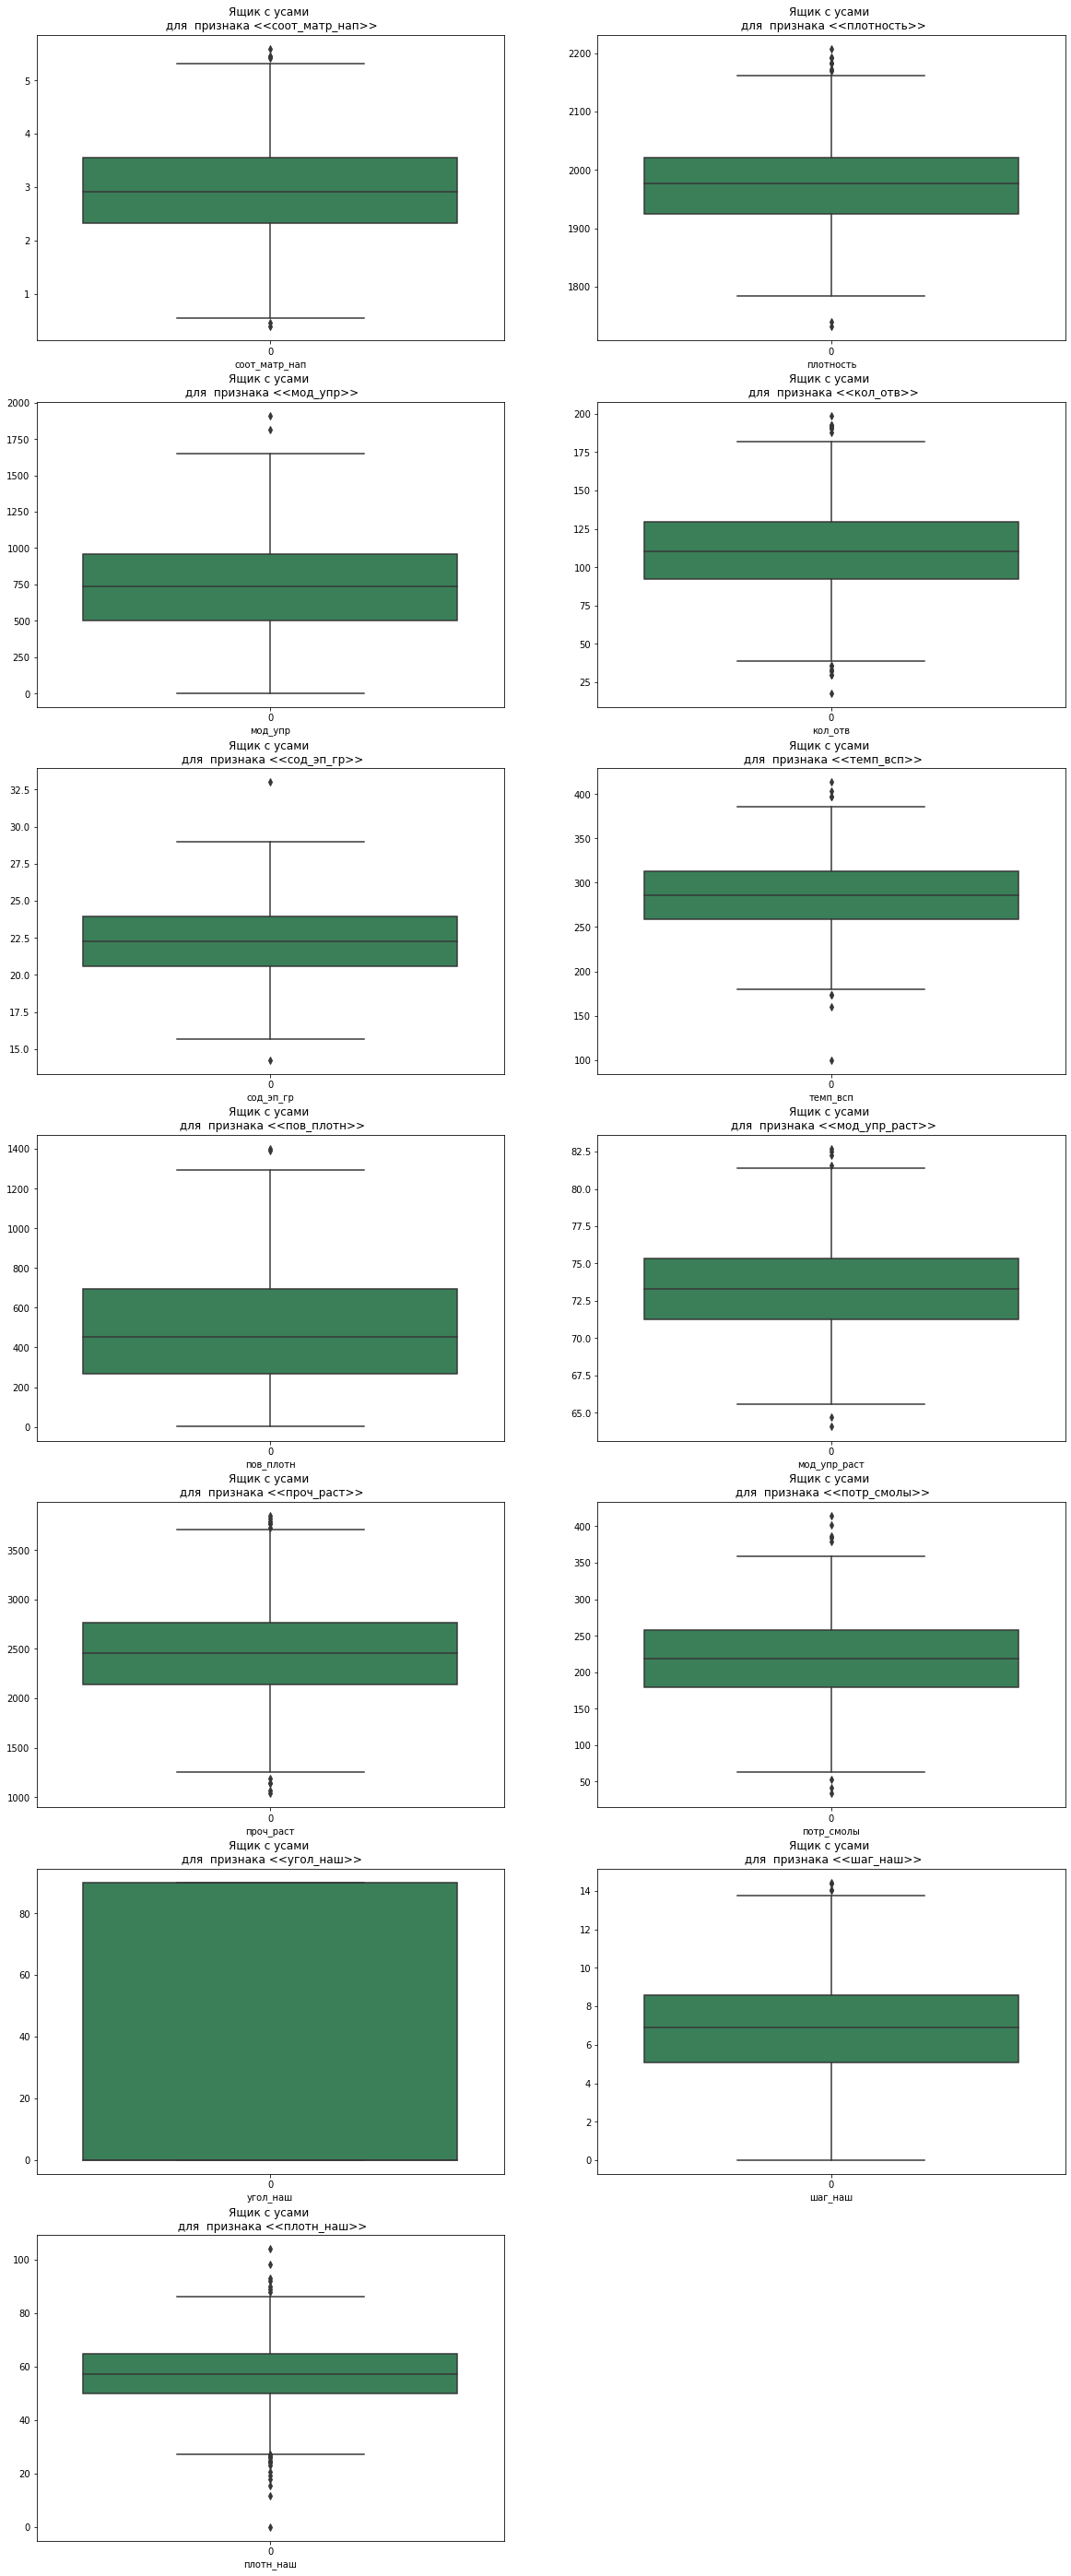

In [169]:
fig, axes = plt.subplots(2, sharey=True, figsize=(20,50))
for i, col in enumerate(int_var):
    plt.subplot(7,2,i+1)
    sns.boxplot(data=df[col], whis = 1.5, color = "seagreen")
    plt.title("Ящик с усами \n для  признака <<{}>>".format(col))
    plt.xlabel(col)

##Построим попарные графики рассеяния

In [170]:
sns.pairplot(df);

Output hidden; open in https://colab.research.google.com to view.

##Проведем предобработку данных

In [171]:
#удаляем выбросы, целевые признаки не трогаем
df = df.drop(df[(df.плотность < 1820) | (df.плотность > 2160)].index)
df = df.drop(df[(df.мод_упр > 1650)].index)
df = df.drop(df[(df.кол_отв < 40) | (df.кол_отв > 185)].index)
df = df.drop(df[(df.сод_эп_гр < 16) | (df.сод_эп_гр > 29)].index)
df = df.drop(df[(df.темп_всп < 180) | (df.темп_всп > 380)].index)
df = df.drop(df[(df.пов_плотн > 1280)].index)
df = df.drop(df[(df.потр_смолы < 65) | (df.потр_смолы > 360)].index)
df = df.drop(df[(df.шаг_наш > 13.7)].index)
df = df.drop(df[(df.плотн_наш < 26) | (df.плотн_наш > 85)].index)
df

,соот_матр_нап,плотность,мод_упр,кол_отв,сод_эп_гр,темп_всп,пов_плотн,мод_упр_раст,проч_раст,потр_смолы,угол_наш,шаг_наш,плотн_наш
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
5,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,60.000000
6,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,70.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [172]:
mms = MinMaxScaler()
data_norm = mms.fit_transform(np.array(df))

In [173]:
df_norm = pd.DataFrame(data = data_norm, columns =['соот_матр_нап',	'плотность',	'мод_упр',	'кол_отв',	'сод_эп_гр',	'темп_всп',	'пов_плотн',	'мод_упр_раст',	'проч_раст', 'потр_смолы',	'угол_наш',	'шаг_наш',	'плотн_наш'])
df_norm

,соот_матр_нап,плотность,мод_упр,кол_отв,сод_эп_гр,темп_всп,пов_плотн,мод_упр_раст,проч_раст,потр_смолы,угол_наш,шаг_наш,плотн_наш
0,0.282131,0.617489,0.447061,0.068506,0.596696,0.511042,0.169158,0.319194,0.698235,0.514688,0.0,0.291000,0.573774
1,0.282131,0.617489,0.447061,0.626716,0.402989,0.591181,0.169158,0.319194,0.698235,0.514688,0.0,0.364441,0.350716
2,0.457857,0.617489,0.455721,0.505606,0.481855,0.511042,0.169158,0.319194,0.698235,0.514688,0.0,0.364441,0.522299
3,0.457201,0.529218,0.452685,0.505606,0.481855,0.511042,0.169158,0.319194,0.698235,0.514688,0.0,0.364441,0.573774
4,0.419084,0.264403,0.488508,0.505606,0.481855,0.511042,0.169158,0.319194,0.698235,0.514688,0.0,0.364441,0.745356
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0.361750,0.388242,0.552781,0.329891,0.315685,0.720233,0.168511,0.485125,0.480312,0.183151,1.0,0.663815,0.351056
920,0.587163,0.676600,0.268550,0.746710,0.275125,0.352687,0.282789,0.475992,0.470745,0.157752,1.0,0.773186,0.466548
921,0.555750,0.447928,0.251612,0.496233,0.612773,0.322515,0.597427,0.573346,0.578340,0.572648,1.0,0.302836,0.704686
922,0.637396,0.725769,0.448724,0.714320,0.247787,0.465017,0.517714,0.536217,0.368070,0.434855,1.0,0.460884,0.543937


##Проведем визуализацию после обработки данных

In [174]:
int_var = df_norm.columns

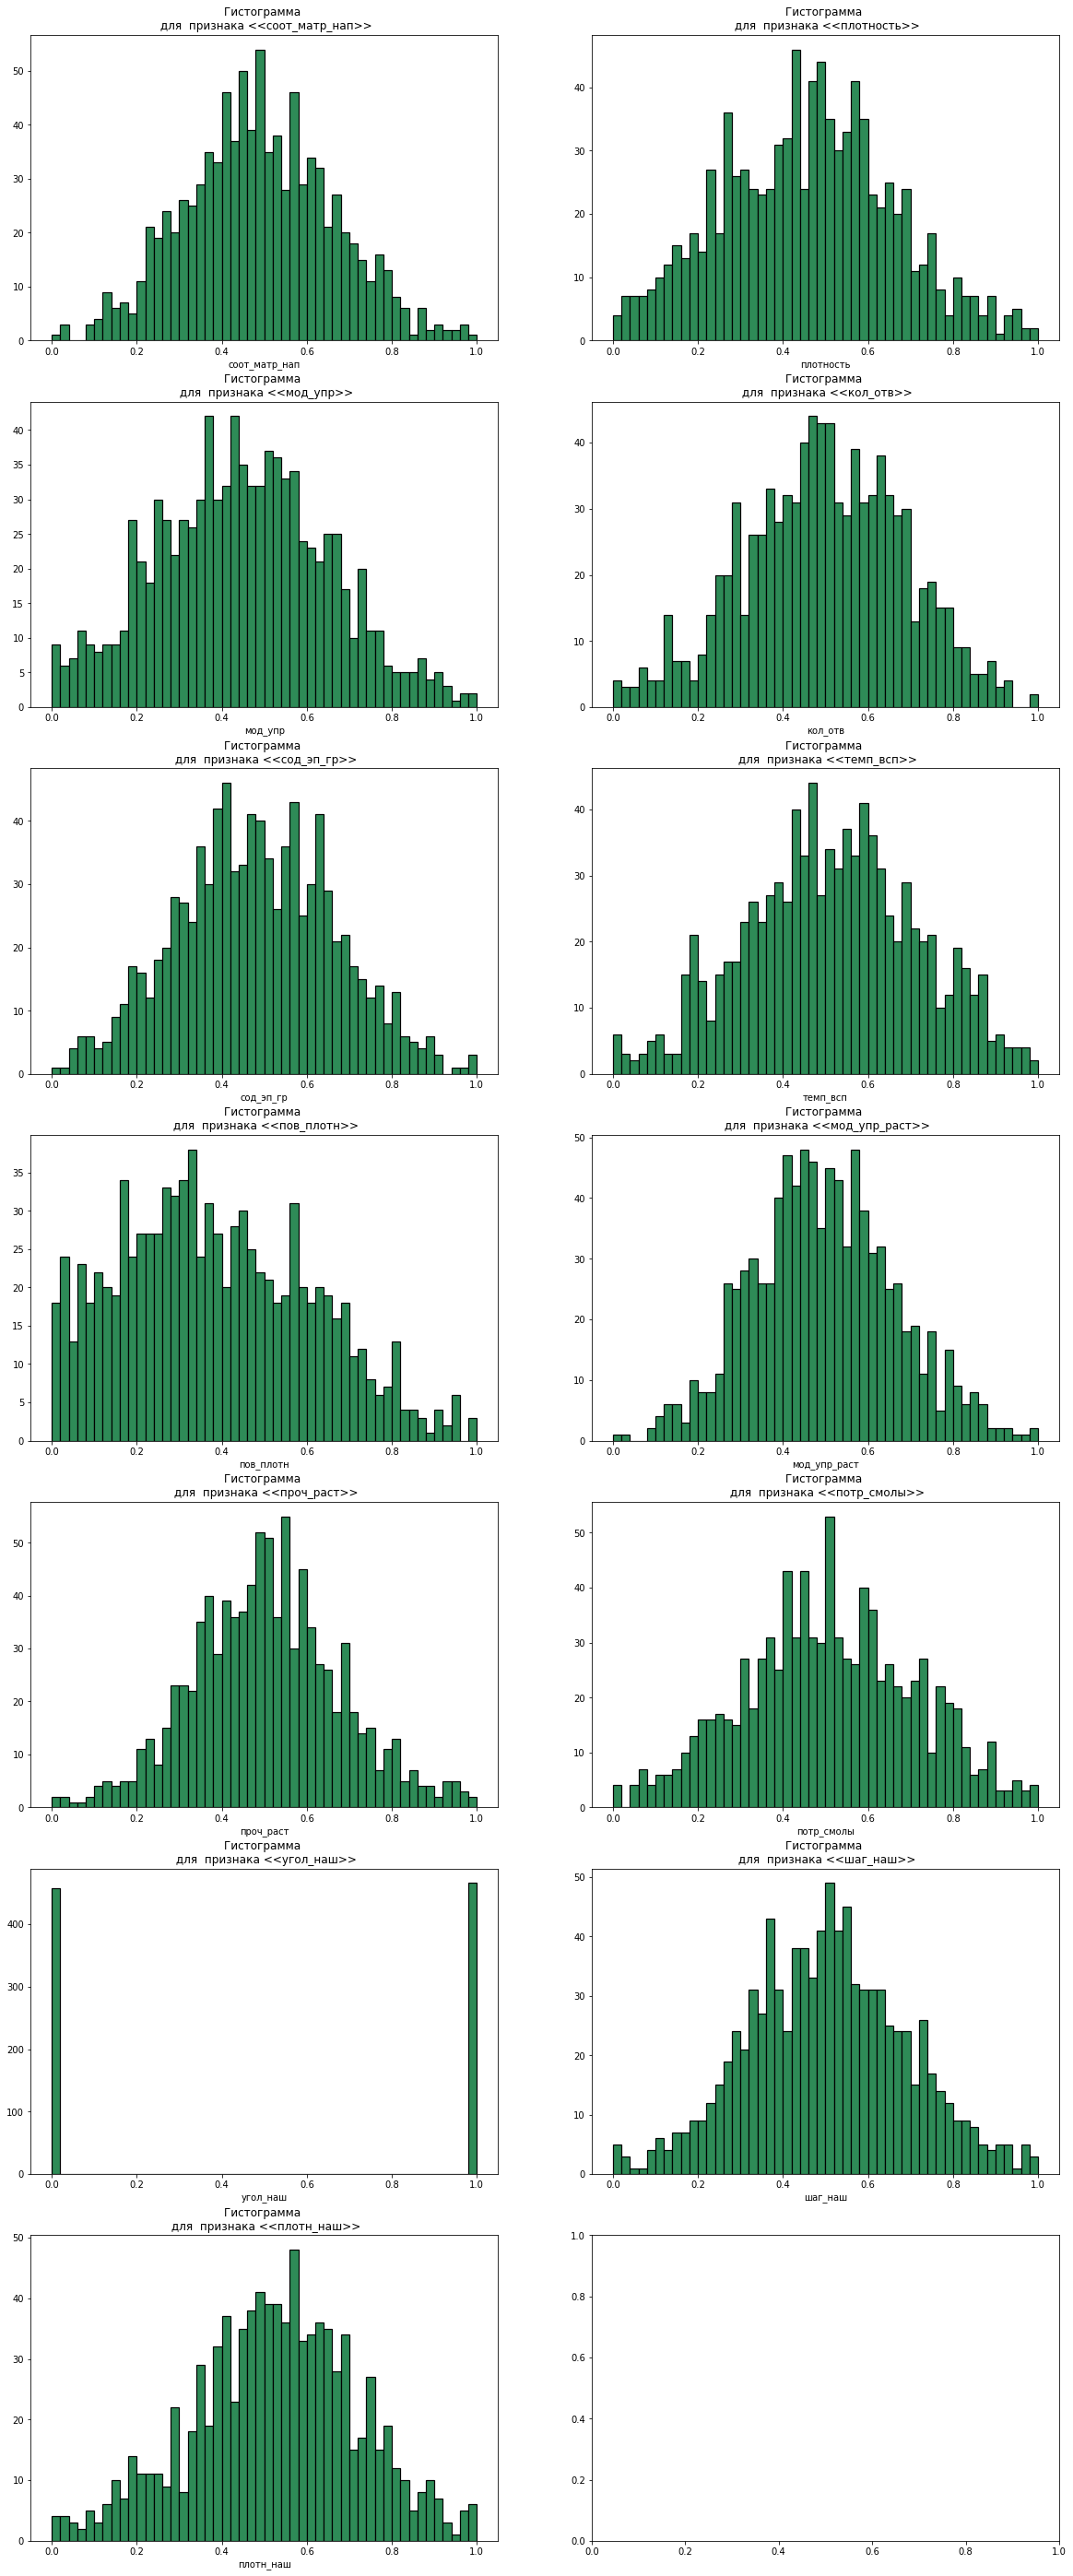

In [175]:
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize=(20,50))
l = 0
for i in range(7):
    for j in range(2):
        axes[i, j].hist(df_norm[int_var[l]], bins = 50, color = "seagreen", edgecolor='black', linewidth=1.2)
        axes[i, j].set_title("Гистограмма \n для  признака <<{}>>".format(int_var[l]))
        axes[i, j].set_xlabel(int_var[l])
        l+=1
        if l > 12:
          break

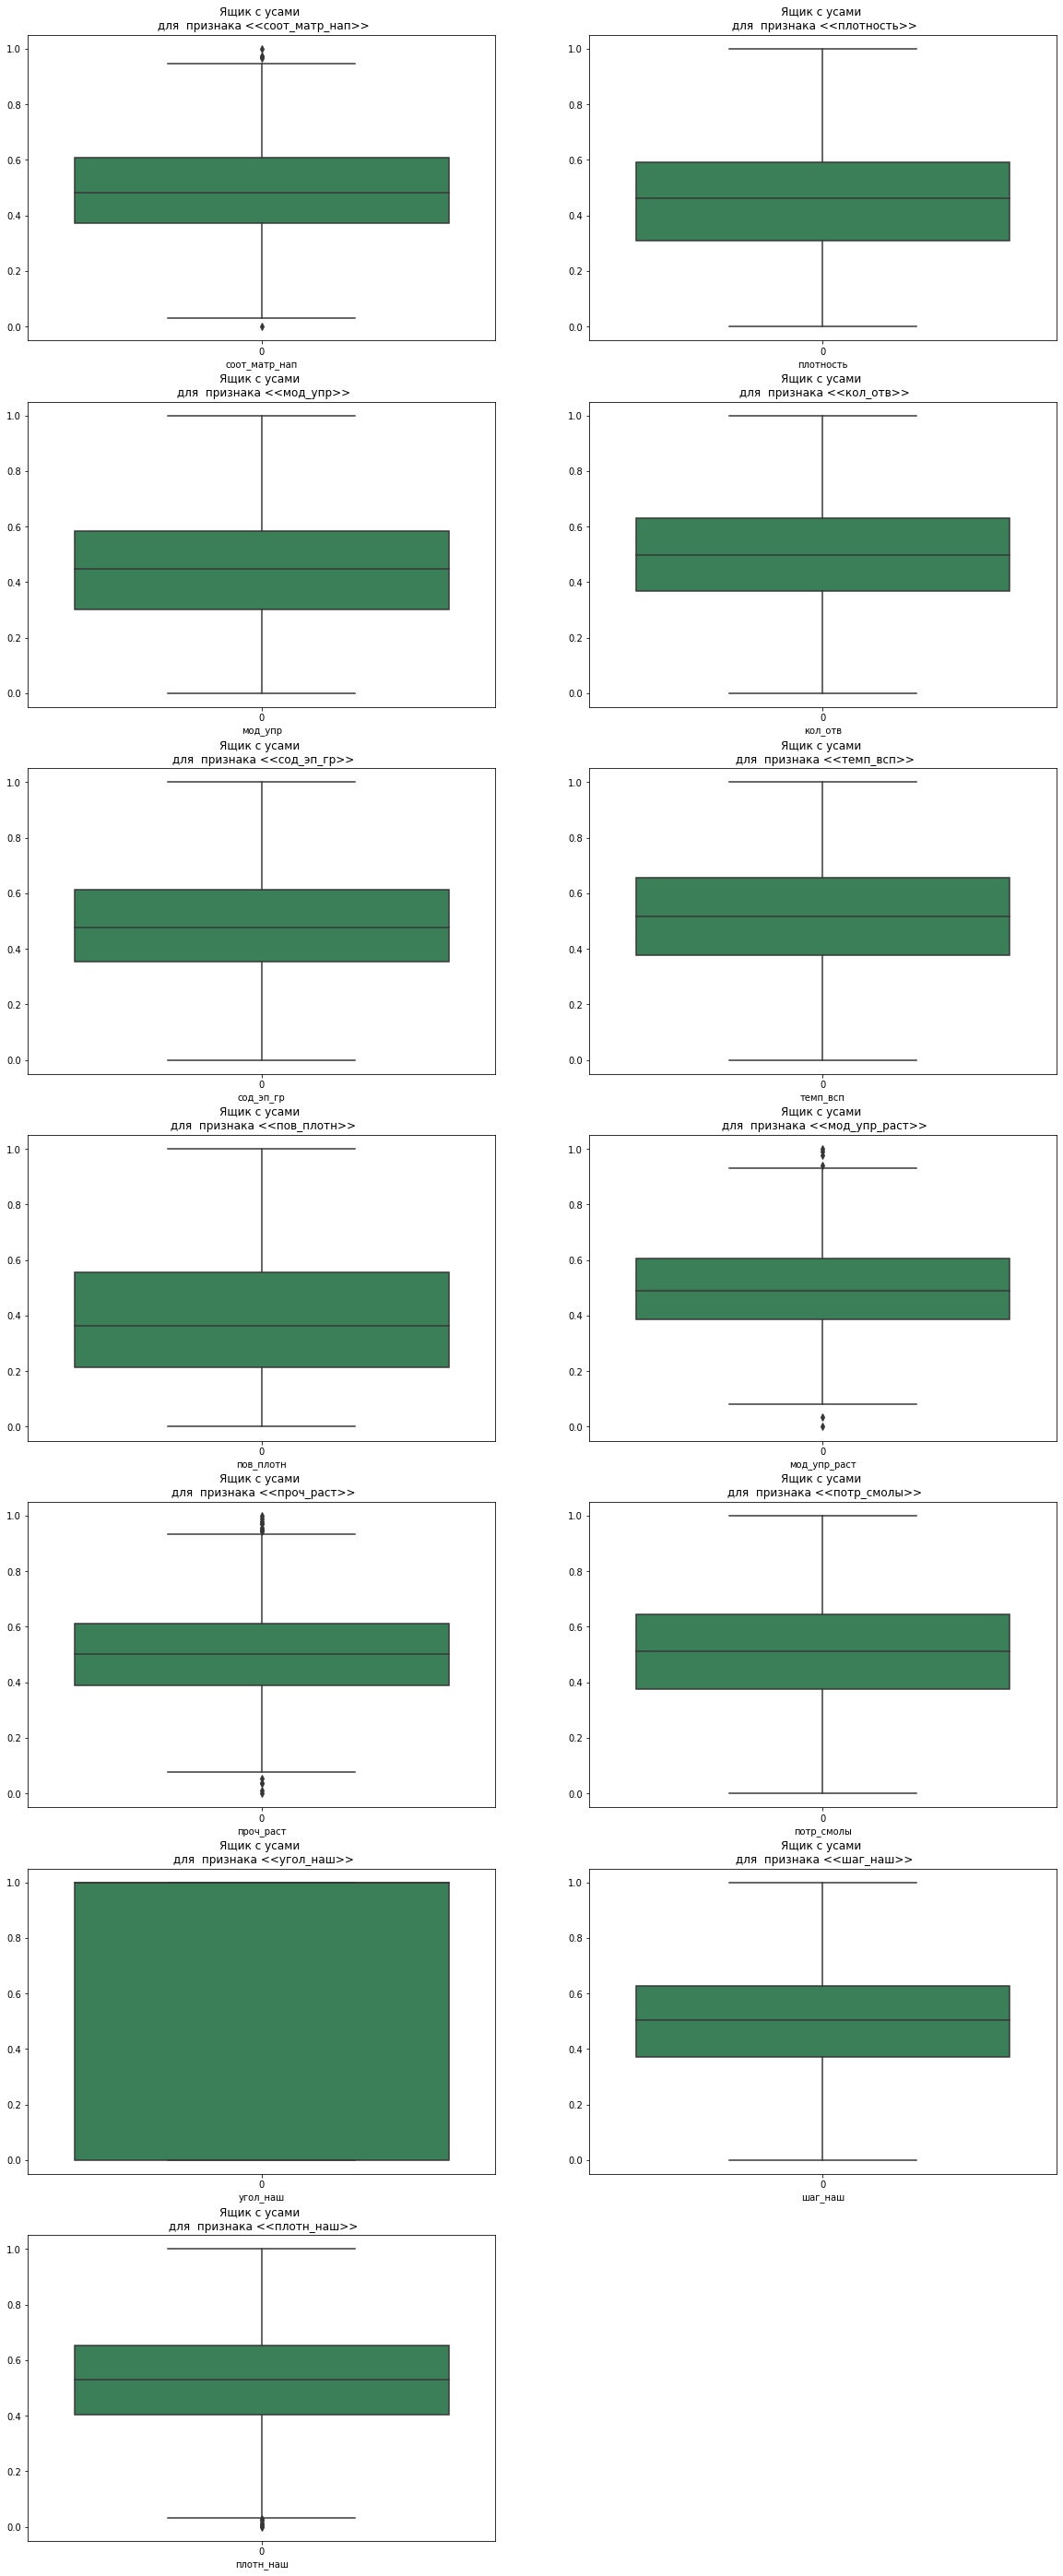

In [176]:
fig, axes = plt.subplots(2, sharey=True, figsize=(20,50))
for i, col in enumerate(int_var):
    plt.subplot(7,2,i+1)
    sns.boxplot(data=df_norm[col], whis = 1.5, color = "seagreen")
    plt.title("Ящик с усами \n для  признака <<{}>>".format(col))
    plt.xlabel(col)

In [177]:
sns.pairplot(df_norm);

Output hidden; open in https://colab.research.google.com to view.

In [178]:
df_norm.describe()

,соот_матр_нап,плотность,мод_упр,кол_отв,сод_эп_гр,темп_всп,пов_плотн,мод_упр_раст,проч_раст,потр_смолы,угол_наш,шаг_наш,плотн_наш
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000
mean,0.488168,0.458437,0.447764,0.497070,0.479753,0.514090,0.386004,0.496350,0.505643,0.507604,0.504329,0.502955,0.525071
std,0.173467,0.200862,0.200291,0.187253,0.184115,0.201505,0.223344,0.167010,0.172383,0.200345,0.500252,0.186546,0.193580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370964,0.307656,0.303019,0.369522,0.354458,0.376679,0.214400,0.385403,0.389793,0.374427,0.000000,0.370368,0.402571
50%,0.483218,0.463529,0.447409,0.496806,0.476665,0.517494,0.363742,0.490537,0.503288,0.511858,1.000000,0.504691,0.528520
75%,0.607154,0.590590,0.582408,0.629655,0.613656,0.655444,0.554642,0.604873,0.609754,0.644739,1.000000,0.627817,0.651503
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [179]:
corr = df_norm.corr()
corr_10 = corr[corr>=.1]
corr_10

,соот_матр_нап,плотность,мод_упр,кол_отв,сод_эп_гр,темп_всп,пов_плотн,мод_упр_раст,проч_раст,потр_смолы,угол_наш,шаг_наш,плотн_наш
соот_матр_нап,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
плотность,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
мод_упр,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
кол_отв,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
сод_эп_гр,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
темп_всп,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
пов_плотн,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
мод_упр_раст,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
проч_раст,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
потр_смолы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


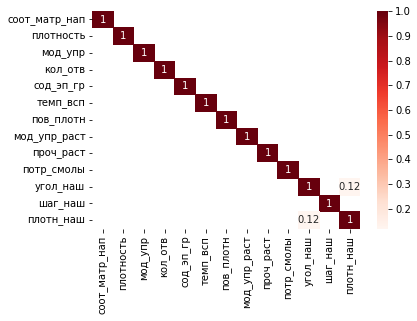

In [180]:
sns.heatmap(corr_10, cmap='Reds', annot=True);

##Прогноз модуля упругости при растяжении

In [181]:
# Линейная регрессия

X = df_norm.drop(['соот_матр_нап', 'мод_упр_раст', 'проч_раст'], axis=1)
y_mod = df_norm[['мод_упр_раст']]

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y_mod,
                                                    test_size=0.3,
                                                    random_state=0)

In [183]:
lr_mod = LinearRegression()
lr_mod.fit(X_train, y_train)
y_mod_pred = lr_mod.predict(X_test)

In [184]:
lr_mod.coef_

array([[-0.03930401,  0.01305379, -0.04890765,  0.00927354,  0.01789968,
         0.0393792 ,  0.07879292,  0.01233273, -0.04506183,  0.046259  ]])

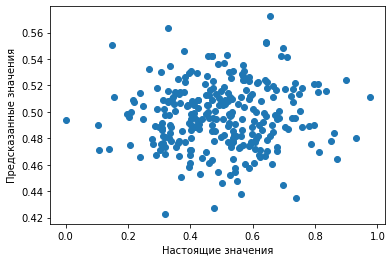

Средняя абсолютная ошибка: 0.1314576268724851
Средняя квадратическая ошибка: 0.02653044502216099
Корень из среднеквадратичной ошибки: 0.16288169026063362
Train score: 0.02354957271791802
Test score: -0.013409993292819111


In [185]:
plt.scatter(y_test, y_mod_pred)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.show()

print('Средняя абсолютная ошибка:', mean_absolute_error(y_test, y_mod_pred))
print('Средняя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_mod_pred))
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_mod_pred)))
print('Train score:', lr_mod.score(X_train, y_train))
print('Test score:', lr_mod.score(X_test, y_test))

In [186]:
# Метод опорных векторов

mov_mod = svm.SVR()
mov_mod.fit(X_train, y_train)
y_mod_pred_mov = mov_mod.predict(X_test)

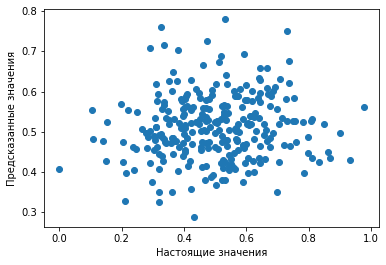

Средняя абсолютная ошибка: 0.14080290512299304
Средняя квадратическая ошибка: 0.03074812596151863
Корень из среднеквадратичной ошибки: 0.17535143558442465
Train score: 0.4319282793427546
Test score: -0.17451697845252467


In [187]:
plt.scatter(y_test, y_mod_pred_mov)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.show()

print('Средняя абсолютная ошибка:', mean_absolute_error(y_test, y_mod_pred_mov))
print('Средняя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_mod_pred_mov))
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_mod_pred_mov)))
print('Train score:', mov_mod.score(X_train, y_train))
print('Test score:', mov_mod.score(X_test, y_test))

In [188]:
# Метод градиентного бустинга

gbr_mod = GradientBoostingRegressor()
gbr_mod.fit(X_train, y_train)
y_mod_pred_gbr = gbr_mod.predict(X_test)

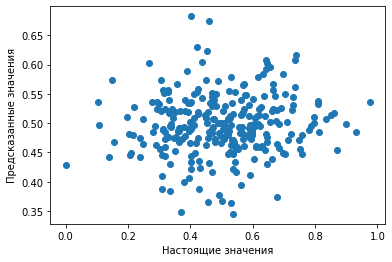

Средняя абсолютная ошибка: 0.13383360968515376
Средняя квадратическая ошибка: 0.027403045830818352
Корень из среднеквадратичной ошибки: 0.16553865358525288
Train score: 0.4906933248119718
Test score: -0.04674160076906397


In [189]:
plt.scatter(y_test, y_mod_pred_gbr)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.show()

print('Средняя абсолютная ошибка:', mean_absolute_error(y_test, y_mod_pred_gbr))
print('Средняя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_mod_pred_gbr))
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_mod_pred_gbr)))
print('Train score:', gbr_mod.score(X_train, y_train))
print('Test score:', gbr_mod.score(X_test, y_test))

In [190]:
# Random Forest Regressor

rfr_mod = RandomForestRegressor(n_estimators=20,max_depth=10)
rfr_mod.fit(X_train, y_train)
y_mod_pred_forest = rfr_mod.predict(X_test)

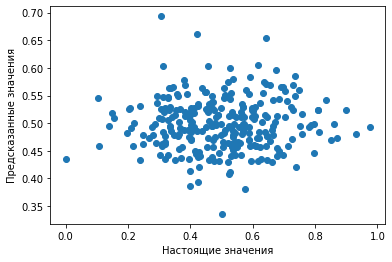

Средняя абсолютная ошибка: 0.13528209334394553
Средняя квадратическая ошибка: 0.028025463599794666
Корень из среднеквадратичной ошибки: 0.16740807507344044
Train score: 0.6427939276105532
Test score: -0.07051671598317877


In [191]:
plt.scatter(y_test, y_mod_pred_forest)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.show()

print('Средняя абсолютная ошибка:', mean_absolute_error(y_test, y_mod_pred_forest))
print('Средняя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_mod_pred_forest))
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_mod_pred_forest)))
print('Train score:', rfr_mod.score(X_train, y_train))
print('Test score:', rfr_mod.score(X_test, y_test))

In [192]:
# Проведем поиск гиперпараметров для модели случайного леса

parametrs = { 'n_estimators': [100, 500],
              'max_depth': [5, 20],
              'max_features': ['auto'],
              'criterion': ['mse'] }
grid = GridSearchCV(estimator = rfr_mod, param_grid = parametrs, cv = 10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=10, n_estimators=20),
             param_grid={'criterion': ['mse'], 'max_depth': [5, 20],
                         'max_features': ['auto'], 'n_estimators': [100, 500]})

In [193]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [194]:
rfr_gp_mod = RandomForestRegressor(n_estimators = 500, criterion = 'mse', max_depth = 5, max_features = 'auto')
rfr_gp_mod.fit(X_train, y_train)
y_mod_pred_forest_gp = rfr_gp_mod.predict(X_test)

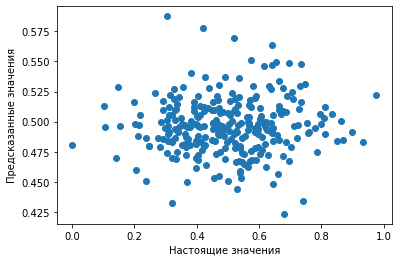

Средняя абсолютная ошибка: 0.13085290669282332
Средняя квадратическая ошибка: 0.026335264811484127
Корень из среднеквадратичной ошибки: 0.16228143705145123
Train score: 0.2690318405781257
Test score: -0.00595449920564084


In [195]:
plt.scatter(y_test, y_mod_pred_forest_gp)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.show()

print('Средняя абсолютная ошибка:', mean_absolute_error(y_test, y_mod_pred_forest_gp))
print('Средняя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_mod_pred_forest_gp))
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_mod_pred_forest_gp)))
print('Train score:', rfr_gp_mod.score(X_train, y_train))
print('Test score:', rfr_gp_mod.score(X_test, y_test))

###Средняя абсолютная ошибка для прогноза модуля упругости при растяжении:


*   Линейная регрессия - 0,146.
*   Метод опорных векторов - 0,153.
*   Метод градиентного бустинга - 0,149.
*   Случайный лес - 0,15.
*   Случайный лес с подборкой гиперпараметров - 0,147.



##Прогнозируем прочность при растяжении

In [196]:
# Линейная регрессия

X = df_norm.drop(['соот_матр_нап', 'мод_упр_раст', 'проч_раст'], axis=1)
y_pro = df_norm[['проч_раст']]

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y_pro,
                                                    test_size=0.3,
                                                    random_state=0)

In [198]:
lr_pro = LinearRegression()
lr_pro.fit(X_train, y_train)
y_pro_pred = lr_pro.predict(X_test)

In [199]:
lr_pro.coef_

array([[-0.02239765,  0.03054683,  0.00288659, -0.03892687, -0.03521048,
        -0.03121767,  0.0281668 ,  0.00820025, -0.06135608,  0.0526073 ]])

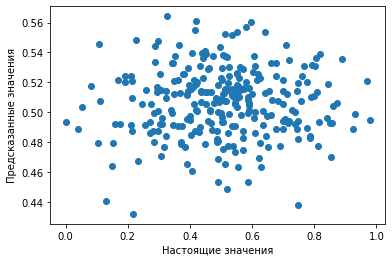

Средняя абсолютная ошибка: 0.1466500201752857
Средняя квадратическая ошибка: 0.03479936514264444
Корень из среднеквадратичной ошибки: 0.18654587945769383
Train score: 0.01831605646069112
Test score: -0.0073758987969532175


In [200]:
plt.scatter(y_test, y_pro_pred)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.show()

print('Средняя абсолютная ошибка:', mean_absolute_error(y_test, y_pro_pred))
print('Средняя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_pro_pred))
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pro_pred)))
print('Train score:', lr_pro.score(X_train, y_train))
print('Test score:', lr_pro.score(X_test, y_test))

In [201]:
# Метод опорных векторов

mov_pro = svm.SVR()
mov_pro.fit(X_train, y_train)
y_pro_pred_mov = mov_pro.predict(X_test)

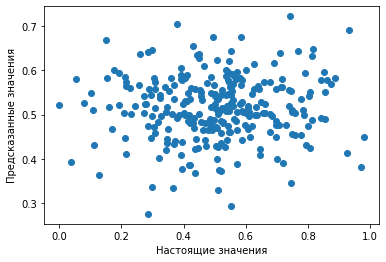

Средняя абсолютная ошибка: 0.15284020875757312
Средняя квадратическая ошибка: 0.038872958067208495
Корень из среднеквадратичной ошибки: 0.19716226329398964
Train score: 0.4339855987304655
Test score: -0.1252987205752989


In [202]:
plt.scatter(y_test, y_pro_pred_mov)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.show()

print('Средняя абсолютная ошибка:', mean_absolute_error(y_test, y_pro_pred_mov))
print('Средняя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_pro_pred_mov))
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pro_pred_mov)))
print('Train score:', mov_pro.score(X_train, y_train))
print('Test score:', mov_pro.score(X_test, y_test))

In [203]:
# Метод градиентного бустинга

gbr_pro = GradientBoostingRegressor()
gbr_pro.fit(X_train, y_train)
y_pro_pred_gbr = gbr_pro.predict(X_test)

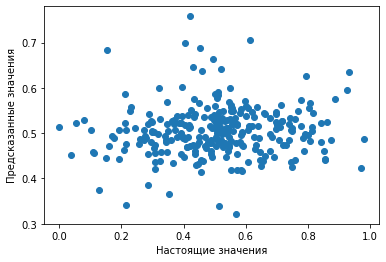

Средняя абсолютная ошибка: 0.14983601905032773
Средняя квадратическая ошибка: 0.036077056271176064
Корень из среднеквадратичной ошибки: 0.18993961216970004
Train score: 0.5014902622655226
Test score: -0.04436264392042011


In [204]:
plt.scatter(y_test, y_pro_pred_gbr)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.show()

print('Средняя абсолютная ошибка:', mean_absolute_error(y_test, y_pro_pred_gbr))
print('Средняя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_pro_pred_gbr))
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pro_pred_gbr)))
print('Train score:', gbr_pro.score(X_train, y_train))
print('Test score:', gbr_pro.score(X_test, y_test))

In [205]:
# Random Forest Regressor

rfr_pro = RandomForestRegressor(n_estimators=20,max_depth=10)
rfr_pro.fit(X_train, y_train)
y_pro_pred_forest = rfr_pro.predict(X_test)

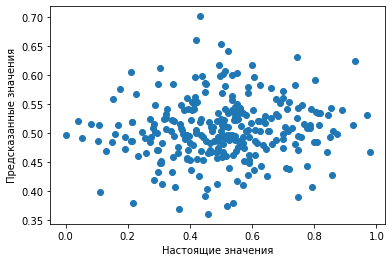

Средняя абсолютная ошибка: 0.14866783003809042
Средняя квадратическая ошибка: 0.03564150318357577
Корень из среднеквадратичной ошибки: 0.18878957382116146
Train score: 0.650648495145942
Test score: -0.0317542046199728


In [206]:
plt.scatter(y_test, y_pro_pred_forest)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.show()

print('Средняя абсолютная ошибка:', mean_absolute_error(y_test, y_pro_pred_forest))
print('Средняя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_pro_pred_forest))
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pro_pred_forest)))
print('Train score:', rfr_pro.score(X_train, y_train))
print('Test score:', rfr_pro.score(X_test, y_test))

In [207]:
# Проведем поиск гиперпараметров для модели случайного леса

parametrs = { 'n_estimators': [100, 500],
              'max_depth': [5, 20],
              'max_features': ['auto'],
              'criterion': ['mse'] }
grid = GridSearchCV(estimator = rfr_pro, param_grid = parametrs, cv = 10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(max_depth=10, n_estimators=20),
             param_grid={'criterion': ['mse'], 'max_depth': [5, 20],
                         'max_features': ['auto'], 'n_estimators': [100, 500]})

In [208]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [209]:
rfr_gp_pro = RandomForestRegressor(n_estimators = 500, criterion = 'mse', max_depth = 5, max_features = 'auto')
rfr_gp_pro.fit(X_train, y_train)
y_pro_pred_forest_gp = rfr_gp_pro.predict(X_test)

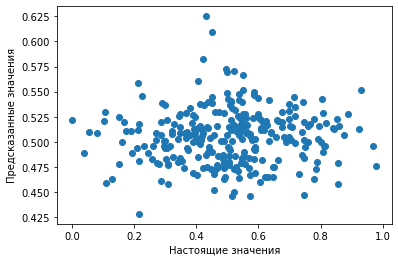

Средняя абсолютная ошибка: 0.14701680414139143
Средняя квадратическая ошибка: 0.03486293269438097
Корень из среднеквадратичной ошибки: 0.18671618219742223
Train score: 0.27695914141279476
Test score: -0.00921605936604486


In [210]:
plt.scatter(y_test, y_pro_pred_forest_gp)
plt.xlabel('Настоящие значения')
plt.ylabel('Предсказанные значения')
plt.show()

print('Средняя абсолютная ошибка:', mean_absolute_error(y_test, y_pro_pred_forest_gp))
print('Средняя квадратическая ошибка:', metrics.mean_squared_error(y_test, y_pro_pred_forest_gp))
print('Корень из среднеквадратичной ошибки:', np.sqrt(metrics.mean_squared_error(y_test, y_pro_pred_forest_gp)))
print('Train score:', rfr_gp_pro.score(X_train, y_train))
print('Test score:', rfr_gp_pro.score(X_test, y_test))

###Средняя абсолютная ошибка для прогноза прочности при растяжении:


*   Линейная регрессия - 0,1467.
*   Метод опорных векторов - 0,1528.
*   Метод градиентного бустинга - 0,1502.
*   Случайный лес - 0,1484.
*   Случайный лес с подборкой гиперпараметров - 0,1471.

##Построим нейронную сеть для предсказания соотношения матрица-наполнитель

In [211]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [212]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('соот_матр_нап')
test_labels = test_features.pop('соот_матр_нап')

In [213]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

In [214]:
# Построим многослойный персептрон
def compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(1),
])
  
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [215]:
itog_model = compile_model(normalizer)
itog_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 12)               25        
 ion)                                                            
                                                                 
 dense_12 (Dense)            (None, 128)               1664      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                      

In [216]:
%time
history = itog_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 11 µs
Epoch 1/100
19/19 [==============================] - 1s 12ms/step - loss: 2.3401 - val_loss: 1.1385
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.9725 - val_loss: 0.8935
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 0.8481 - val_loss: 0.8500
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.8073 - val_loss: 0.8081
Epoch 5/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7982 - val_loss: 0.8048
Epoch 6/100
19/19 [==============================] - 0s 6ms/step - loss: 0.7598 - val_loss: 0.8001
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.7346 - val_loss: 0.7865
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 0.7101 - val_loss: 0.8102
Epoch 9/100
19/19 [==============================] - 0s 4ms/step - loss: 0.7368 - val_loss: 0.8274
Epoch 10/100
19/19 [==========================

In [217]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.148348,0.902362,95
96,0.139414,0.883634,96
97,0.129413,0.866384,97
98,0.119439,0.893686,98
99,0.109648,0.879466,99


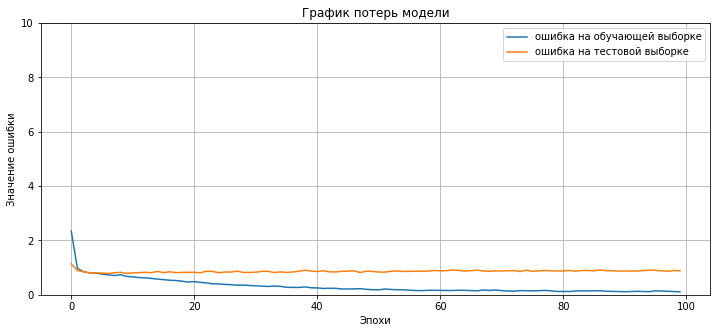

In [218]:
plt.figure(figsize = (12,5))
plt.plot(history.history['loss'], label = 'ошибка на обучающей выборке')
plt.plot(history.history['val_loss'], label = 'ошибка на тестовой выборке')
plt.ylim([0, 10])
plt.title('График потерь модели')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи')
plt.legend()
plt.grid(True)
plt.show()

6/6 [==============================] - 0s 3ms/step


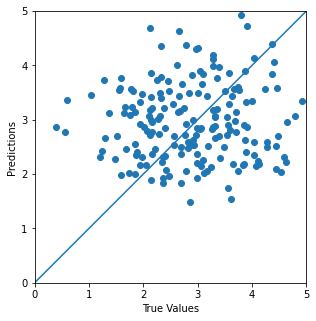

In [219]:
test_predictions = itog_model.predict(test_features).flatten()

plt.figure(figsize = (17,5))
a = plt.axes(aspect = 'equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [221]:
itog_model.save("itog_model")